In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

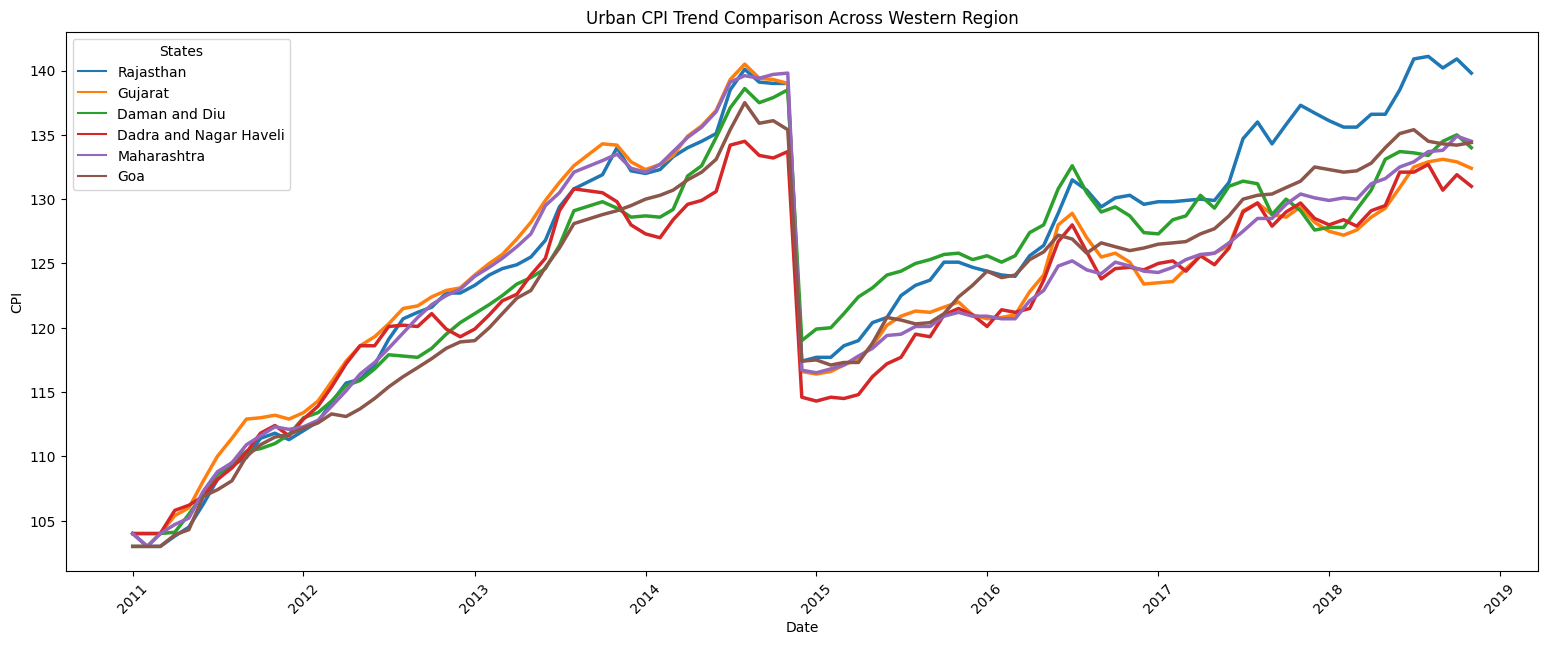

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv("urban_data.csv")

# Mapping for month names
month_name_mapping = {
    "January": "Jan",
    "February": "Feb",
    "March": "Mar",
    "April": "Apr",
    "May": "May",
    "June": "Jun",
    "July": "Jul",
    "August": "Aug",
    "September": "Sep",
    "October": "Oct",
    "November": "Nov",
    "December": "Dec"
}
df['Name'] = df['Name'].map(month_name_mapping)

# Combine 'Year' and 'Name' columns into a single 'date' column
df['date'] = df['Year'].astype(str) + '-' + df['Name']  # Combine year and month
df['date'] = pd.to_datetime(df['date'], format='%Y-%b')  # Convert to datetime with abbreviated month name format

# Define the states you want to compare (replace with the desired state names)
states_to_compare = ['Daman and Diu','Dadra and Nagar Haveli','Maharashtra','Gujarat','Goa','Rajasthan']

# Pivot the DataFrame to have states in rows
df_pivot = df.melt(id_vars=['date', 'Year', 'Name'], var_name='state', value_name='CPI')

# Filter data for the specific states to compare
state_data = df_pivot[df_pivot['state'].isin(states_to_compare)]

# Create a line plot to compare CPI across states
plt.figure(figsize=(19, 7))
sns.lineplot(data=state_data, x='date', y='CPI', hue='state', palette='tab10', linewidth=2.5)
plt.title("Urban CPI Trend Comparison Across Western Region")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='States')
plt.show()
